In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
#!pip install keras-cv keras-core

In [3]:
# import tensorflow_datasets as tfds
from tensorflow import keras
# import cv2
# from tensorflow.keras import optimizers
import keras_cv
import numpy as np
# from keras_cv import bounding_box
# import os
# import resource
from keras_cv import visualization
import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend


/Users/brncat/Downloads/AltaVerde/GitHub/object_localizer/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

/Users/brncat/Downloads/AltaVerde/GitHub/object_localizer/.venv/lib/python3.11/site-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/Users/brncat/Downloads/AltaVerde/GitHub/object_localizer/.venv/lib/python3.11/site-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


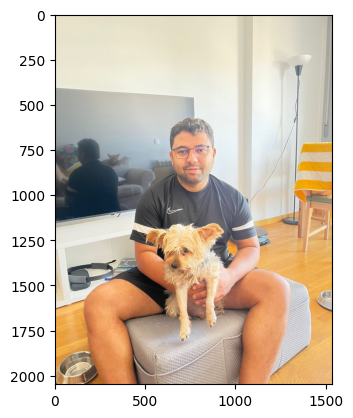

(1, 2048, 1536, 3)


In [5]:
filepath = '/Users/brncat/Downloads/WhatsApp.jpeg'
image = keras.utils.load_img(filepath)
image = np.array(image)
plt.imshow(image)
plt.show()

# resize image to tensor shape (1, h, w, c)
h, w, c = image.shape
batch = np.expand_dims(image, axis=0) #= image.reshape(1, h, w, c)
print(batch.shape)


# visualization.plot_image_gallery(
#     batch,
#     value_range=(0, 255),
#     rows=1,
#     cols=1,
#     scale=5,
# )

In [6]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [7]:
# cast to tensor and resize
image_batch = inference_resizing(batch)

In [8]:
image_batch.shape

TensorShape([1, 640, 640, 3])

In [9]:
# utility to display the object labels
label_names = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
id2label = {k: v for k, v in enumerate(label_names)}

1/1 [==============================] - 15s 15s/step


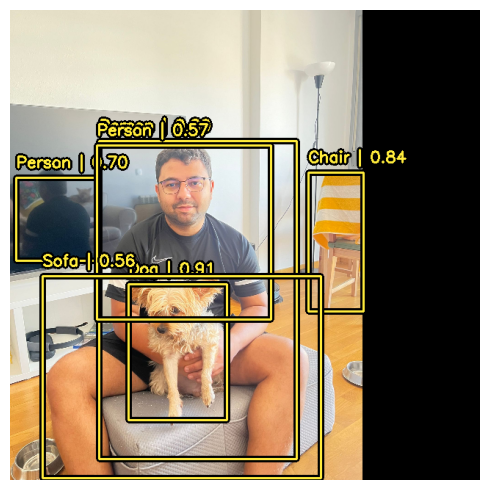

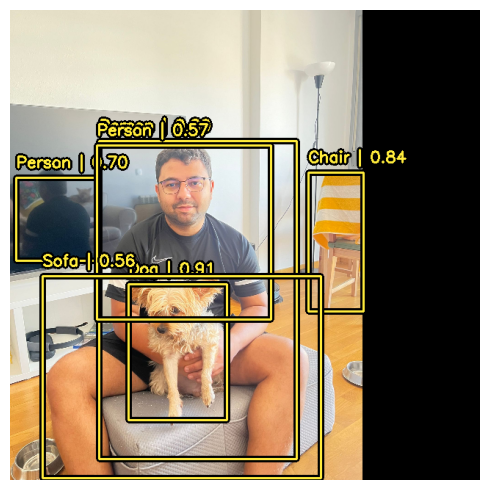

In [10]:
# predict bounding boxes
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., "boxes": ...}

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

We get a lot of anchor boxes...

In [11]:
y_pred

{'boxes': array([[[161.4606  , 373.58362 , 134.28821 , 184.46588 ],
         [406.76703 , 221.91394 ,  74.40045 , 188.60052 ],
         [121.120575, 178.44572 , 269.0589  , 433.44812 ],
         [  8.956608, 228.06001 , 111.77031 , 113.450485],
         [118.97667 , 184.42044 , 236.12166 , 236.96777 ],
         [ 44.11116 , 362.425   , 379.14252 , 275.0244  ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  

### Non-Max Suppression

 - The following NonMaxSuppression layer is used to filter out the bounding boxes with low confidence scores.
 - The iou_threshold parameter is used to determine the overlap between two bounding boxes.
 - If the overlap is greater than iou_threshold, the bounding box with the lower confidence score is removed.

In [12]:
# MultiClassNonMaxSuppression is a post-processing layer that performs non-maximum 
# suppression (NMS) on the predicted bounding boxes.
prediction_decodering = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=0.3,
    confidence_threshold=0.7,
)

pretrained_model.prediction_decoder = prediction_decodering

1/1 [==============================] - 1s 953ms/step


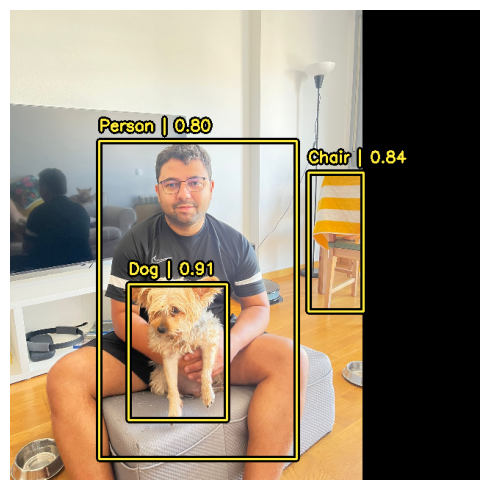

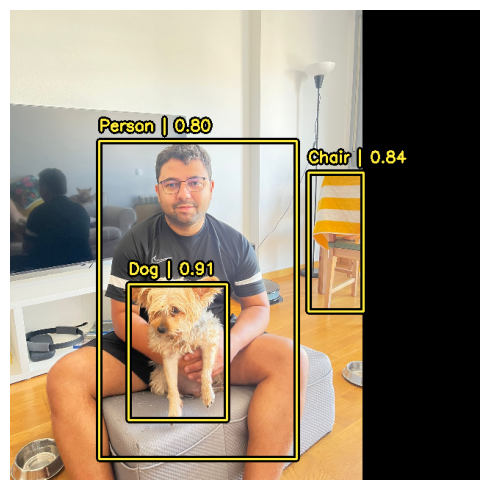

In [13]:
y_pred = pretrained_model.predict(image_batch)

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

In [14]:
y_pred

{'boxes': array([[[161.4606  , 373.58362 , 134.28821 , 184.46588 ],
         [406.76703 , 221.91394 ,  74.40045 , 188.60052 ],
         [121.120575, 178.44572 , 269.0589  , 433.44812 ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
         [ -1.      ,  -1.      ,  -1.      ,  

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=MX0OjkejxdQSDmAji-evkg&n=Pretrained+Object+Detection)

Notice that before, y_pred had 6 bounding boxes (including my shadow on the TV). Now it presents only 3.